# Explore SDY736
<i><font size=2 color="grey">Version 1.0, last modified November 2017<br>
Python 3.6<br>
pandas 0.21.0<br>
seaborn 0.8.1<br>
matplotlib 2.1.0<br>
</font></i> 
  
This is a tutorial on using Python tools to prepare ImmPort study information for analysis. This tutorial should NOT be considered as a real scientific analysis of this study, but is ONLY intended to show how be prepare data
for real analysis. This tutorial will use SDY736 as the example study, so we will be using by downloading
the SDY736-DR24_Tab.zip file from the Immport Data Browser site.

<div class="alert alert-block alert-info">
ImmPort generates new or updated study packages approximately 6 times a year. The DR24 in the file name
mentioned above indicates this file was generated for Data Release 24. When you use this tutorial, it is
best to use the latest Data Release version when downloading the SDY736-DRXX_Tab.zip file. 

If you are interested in doing cross study analysis, ImmPort generates an ALLSTUDIES-DR24_Tab.zip file, which
can be used for cross study analysis, because it contains the meta data for all currently released studies.

The Data Release packages are also available in in a format compatible for loading into a MySQL database. Scripts
to load the data into MySQL are included in the package.
</div>

The Data Release study packages available for download contain many types of data that you can explore.
The data in the SDY736-DR24_Tab.zip package was extracted from a MySQL database and the content of each file
in the package contains the data from a table.

An overview of the ImmPort data model is available [here](http://www.immport.org/immport-open/public/schema/schemaTree), the table definitions are available [here](http://www.immport.org/immport-open/public/schema/schemaDefinition/study), and the ER diagrams are available [here](http://www.immport.org/immport-open/public/schema/schemaDiagram/AllTables)


For this analysis we will start by creating a top level directory named SDY736. Below the SDY736 directory three directories where created: data, downloads and notebooks. The SDY736-DR24_Tab.zip file was downloaded from the ImmPort Data Browser [web site](https://aspera-immport.niaid.nih.gov:9443) to the **downloads** directory.

The following commands were used to unzip and move the contents to the **data** directory

```shell
cd downloads
unzip SDY736-DR24_Tab.zip
cd SDY736-DR24_Tab/Tab
mv * ../../../data
```

## Import Standard Modules

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Setup Environment Variables

In [2]:
META_DATA_DIR="../data/Tab"

## Review Study Design

In the ImmPort model a **study** can have one or more **arms_or_cohort** records, and a **subject** is 
assigned to **arm_or_cohort** using the **arm_2_subject** table. Read in the study, arm_or_cohort and
arm_2_subject data, so we can build a DataFrame that includes the study_accession, arm_accession and
subject_accession. For the last step in this section, we will merge in the **subject** demographic
information into the study_design DataFrame.

<div class="alert alert-block alert-info">
If you want to make a quick review of the types of data available in any table, you can use the df.head()
command to get a tabular view of the table, after using the pd.read_table command. The df.head() command
should be the last line in a notebook cell, to get the table informaton to display. *Note*: replace df with
the name of the DataFrame you loaded using the pd.read_table method.
</div>

In [3]:
study = pd.read_table(META_DATA_DIR + "/study.txt",sep="\t")
arm_or_cohort = pd.read_table(META_DATA_DIR + "/arm_or_cohort.txt",sep="\t")
arm_2_subject = pd.read_table(META_DATA_DIR + "/arm_2_subject.txt",sep="\t")
subject = pd.read_table(META_DATA_DIR + "/subject.txt",sep="\t")

In [4]:
# Uncomment a line below to review DataFrame information
#study.head()
#arm_or_cohort.head()
#arm_2_subject.head()
#subject.head()

In [5]:
# Uncomment a line below to review the columns in a DataFrame
#print("study: ",study.columns)
#print("arm_or_cohort: ",arm_or_cohort.columns)
#print("arm_2_subjct: ",arm_2_subject.columns)
#print("subject: ",subject.columns)

### ARM_ACCESSION to ARM_NAME

In some cases the ARM_NAME can be quite long, so when we later merge tables together the ARM_NAME
will not be included. So we can refer to the information below to understand the ARM_NAME for
each ARM.

In [6]:
arm_or_cohort

,ARM_ACCESSION,DESCRIPTION,NAME,STUDY_ACCESSION,TYPE,WORKSPACE_ID
0,ARM3054,These donors were found to be seropositive for...,CMV positive,SDY736,OBSERVATIONAL,3366
1,ARM3055,These donors were found to be sero-negative fo...,CMV negative,SDY736,OBSERVATIONAL,3366


## Clean and Merge Study, Arm_Or_Cohort, Arm_2_Subject and Subject

In this section, we will merge table information together to simplify downstream analysis, plus remove columns
not necessary for this tutorial. At the end of this process we will have a DataFrame **study_design**
containing the merged content of the **arm_or_cohort** table, the **arm_2_subject** table and **subject**
table.

In the ImmPort data model a **subject** may be assigned to multiple studies, and their age information may
change over time. For this reason when a **subject** is assigned to an **arm** within a **study**, the
age and phenotype information is contained in the **arm_2_subject** table.

<div class="alert alert-block alert-info">
The merging operation in pandas is very similar to a JOIN between 2 tables in a SQL database.
</div>

In [7]:
# Uncomment a line below to review the number of rows and columns in a DataFrame
#print("study: ",study.shape)
#print("arm_or_cohort: ",arm_or_cohort.shape)
#print("arm_2_subject: ",arm_2_subject.shape)
#print("subject: ",subject.shape)

In [8]:
arm_or_cohort_short = arm_or_cohort[['STUDY_ACCESSION','ARM_ACCESSION']]
study_arm_subject = pd.merge(arm_or_cohort_short,arm_2_subject,
                            left_on='ARM_ACCESSION', right_on='ARM_ACCESSION')
study_design = pd.merge(study_arm_subject,subject,
                       left_on='SUBJECT_ACCESSION',right_on='SUBJECT_ACCESSION')

In [9]:
study_design.head()

,STUDY_ACCESSION,ARM_ACCESSION,SUBJECT_ACCESSION,AGE_EVENT,AGE_EVENT_SPECIFY,AGE_UNIT,MAX_SUBJECT_AGE,MIN_SUBJECT_AGE,SUBJECT_PHENOTYPE,ANCESTRAL_POPULATION,DESCRIPTION,ETHNICITY,GENDER,RACE,RACE_SPECIFY,SPECIES,STRAIN,STRAIN_CHARACTERISTICS,WORKSPACE_ID
0,SDY736,ARM3054,SUB167226,Age at Study Day 0,NaN,Years,56.27,56.27,NaN,North America,NaN,Hispanic or Latino,Male,White,NaN,Homo sapiens,NaN,NaN,3366
1,SDY736,ARM3054,SUB167227,Age at Study Day 0,NaN,Years,53.63,53.63,NaN,North America,NaN,Not Hispanic or Latino,Female,Unknown,NaN,Homo sapiens,NaN,NaN,3366
2,SDY736,ARM3054,SUB167302,Age at Study Day 0,NaN,Years,58.81,58.81,NaN,North America,NaN,Not Hispanic or Latino,Female,White,NaN,Homo sapiens,NaN,NaN,3366
3,SDY736,ARM3054,SUB167311,Age at Study Day 0,NaN,Years,68.02,68.02,NaN,North America,NaN,Not Hispanic or Latino,Female,White,NaN,Homo sapiens,NaN,NaN,3366
4,SDY736,ARM3054,SUB167314,Age at Study Day 0,NaN,Years,72.39,72.39,NaN,North America,NaN,Not Hispanic or Latino,Female,White,NaN,Homo sapiens,NaN,NaN,3366


## Review Study Statistics
- Arms included in the study

In [10]:
arm_or_cohort[['ARM_ACCESSION','NAME']]

,ARM_ACCESSION,NAME
0,ARM3054,CMV positive
1,ARM3055,CMV negative


- Number of subjects per arm

In [11]:
study_design.groupby('ARM_ACCESSION').count()['SUBJECT_ACCESSION']

ARM_ACCESSION
ARM3054    241
ARM3055    152
Name: SUBJECT_ACCESSION, dtype: int64

- Number of subjects per gender

In [12]:
study_design.groupby('GENDER').count()['SUBJECT_ACCESSION']

GENDER
Female     242
Male       150
Unknown      1
Name: SUBJECT_ACCESSION, dtype: int64

- Number of subjects per gender per arm

In [13]:
pd.crosstab(study_design.ARM_ACCESSION,study_design.GENDER)

GENDER,Female,Male,Unknown
ARM_ACCESSION,,,
ARM3054,158,83,0
ARM3055,84,67,1


### Simple Demographic Plots
- Age distribution per arm

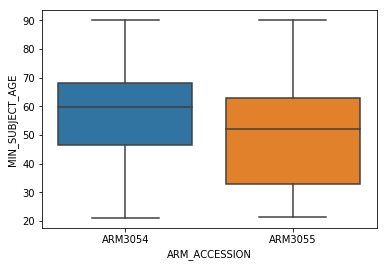

In [14]:
sns.boxplot(x='ARM_ACCESSION',y='MIN_SUBJECT_AGE',data=study_design);

- Age distribution per arm per gender

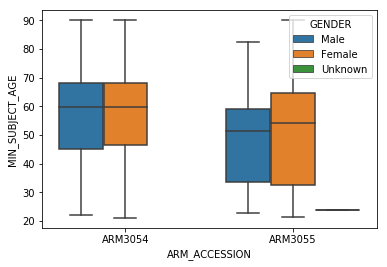

In [15]:
sns.boxplot(x='ARM_ACCESSION',y='MIN_SUBJECT_AGE',hue='GENDER',data=study_design);

## Integration of FCS derived data with Subject and Arm information
  
Let's start by looking at the flow cytometry derived data. The data is parsed and is available in the **fcs_analyzed_result.txt** file. This file can get quite wide so we can change the default parameters for pandas DataFrame display in order to be able to see the table.

In [16]:
pd.options.display.max_columns = 30

In [17]:
fcs_analyzed_result = pd.read_table(META_DATA_DIR + '/fcs_analyzed_result.txt',sep="\t")
fcs_analyzed_result.head()

,RESULT_ID,ARM_ACCESSION,BIOSAMPLE_ACCESSION,COMMENTS,EXPERIMENT_ACCESSION,EXPSAMPLE_ACCESSION,PARENT_POPULATION_PREFERRED,PARENT_POPULATION_REPORTED,POPULATION_DEFNITION_PREFERRED,POPULATION_DEFNITION_REPORTED,POPULATION_NAME_PREFERRED,POPULATION_NAME_REPORTED,POPULATION_STAT_UNIT_PREFERRED,POPULATION_STAT_UNIT_REPORTED,POPULATION_STATISTIC_PREFERRED,POPULATION_STATISTIC_REPORTED,REPOSITORY_ACCESSION,REPOSITORY_NAME,STUDY_ACCESSION,STUDY_TIME_COLLECTED,STUDY_TIME_COLLECTED_UNIT,SUBJECT_ACCESSION,WORKSPACE_FILE_INFO_ID,WORKSPACE_ID
0,938535,ARM3054,BS890648,NaN,EXP14311,ES1006805,NaN,NaN,NaN,CD3-,NaN,CD3 Viability,percentage,percentage,NaN,42.90000,NaN,NaN,SDY736,0,Days,SUB167027,585115,3366
1,938985,ARM3054,BS890932,NaN,EXP14311,ES1007089,NaN,NaN,NaN,"CD3+, CD4-, CD8+, CD28int, CD95low",NaN,"naive thymus-derived CD8-positive, alpha-beta ...",cells/ul,cells/ul,NaN,41.09457,NaN,NaN,SDY736,0,Days,SUB167121,585115,3366
2,938370,ARM3054,BS890550,NaN,EXP14311,ES1006707,NaN,NaN,NaN,CD3-,NaN,CD3 Viability,cells/ul,cells/ul,NaN,780.10000,NaN,NaN,SDY736,0,Days,SUB167148,585115,3366
3,938872,ARM3055,BS890867,NaN,EXP14311,ES1007024,NaN,NaN,NaN,"CD3+, CD4-, CD8+, CD28int, CD95low",NaN,"naive thymus-derived CD8-positive, alpha-beta ...",cells/ul,cells/ul,NaN,76.85000,NaN,NaN,SDY736,0,Days,SUB167377,585115,3366
4,938877,ARM3054,BS890869,NaN,EXP14311,ES1007026,NaN,NaN,NaN,"CD3+, CD4-, CD8+, CD28int, CD95low",NaN,"naive thymus-derived CD8-positive, alpha-beta ...",percentage,percentage,NaN,67.80000,NaN,NaN,SDY736,0,Days,SUB167380,585115,3366


In [18]:
fcs_analyzed_result.groupby('STUDY_TIME_COLLECTED').count()['SUBJECT_ACCESSION']

STUDY_TIME_COLLECTED
0      808
1        2
7        2
13       4
34       2
126      2
176      2
482      2
Name: SUBJECT_ACCESSION, dtype: int64

We can focus on a subset of the information by filtering out columns that are not of interest. Similarly, most of the measures are taken at Study Day 0, and we can filter out results obtained at any other STUDY_TIME_COLLECTED. 

In [19]:
keep = ['ARM_ACCESSION','SUBJECT_ACCESSION','POPULATION_DEFNITION_REPORTED',
        'POPULATION_NAME_REPORTED','POPULATION_STAT_UNIT_REPORTED',
        'POPULATION_STATISTIC_REPORTED','STUDY_TIME_COLLECTED']
fcs_analyzed_result_short = fcs_analyzed_result[fcs_analyzed_result['STUDY_TIME_COLLECTED']==0][keep]

In [20]:
fcs_analyzed_result_short.groupby('STUDY_TIME_COLLECTED').count()['SUBJECT_ACCESSION']

STUDY_TIME_COLLECTED
0    808
Name: SUBJECT_ACCESSION, dtype: int64

- Number of results per population reported

In [21]:
fcs_analyzed_result_short.groupby('POPULATION_DEFNITION_REPORTED').count()['SUBJECT_ACCESSION']

POPULATION_DEFNITION_REPORTED
CD3+, CD4-, CD8+, CD28int, CD95low    354
CD3-                                  454
Name: SUBJECT_ACCESSION, dtype: int64

In [22]:
fcs_analyzed_result_short.head(10)

,ARM_ACCESSION,SUBJECT_ACCESSION,POPULATION_DEFNITION_REPORTED,POPULATION_NAME_REPORTED,POPULATION_STAT_UNIT_REPORTED,POPULATION_STATISTIC_REPORTED,STUDY_TIME_COLLECTED
0,ARM3054,SUB167027,CD3-,CD3 Viability,percentage,42.90000,0
1,ARM3054,SUB167121,"CD3+, CD4-, CD8+, CD28int, CD95low","naive thymus-derived CD8-positive, alpha-beta ...",cells/ul,41.09457,0
2,ARM3054,SUB167148,CD3-,CD3 Viability,cells/ul,780.10000,0
3,ARM3055,SUB167377,"CD3+, CD4-, CD8+, CD28int, CD95low","naive thymus-derived CD8-positive, alpha-beta ...",cells/ul,76.85000,0
4,ARM3054,SUB167380,"CD3+, CD4-, CD8+, CD28int, CD95low","naive thymus-derived CD8-positive, alpha-beta ...",percentage,67.80000,0
5,ARM3054,SUB167380,"CD3+, CD4-, CD8+, CD28int, CD95low","naive thymus-derived CD8-positive, alpha-beta ...",cells/ul,4.15572,0
6,ARM3054,SUB167335,"CD3+, CD4-, CD8+, CD28int, CD95low","naive thymus-derived CD8-positive, alpha-beta ...",percentage,38.10000,0
7,ARM3054,SUB167084,CD3-,CD3 Viability,cells/ul,389.40000,0
8,ARM3055,SUB167333,"CD3+, CD4-, CD8+, CD28int, CD95low","naive thymus-derived CD8-positive, alpha-beta ...",cells/ul,166.48000,0
9,ARM3054,SUB167261,CD3-,CD3 Viability,cells/ul,455.94000,0


For ease of manipulation, we can subset each reported population into individual data structures, and look at the repartition of data between each arm of the study.

In [23]:
name = 'CD3+, CD4-, CD8+, CD28int, CD95low'
column_keep = ['ARM_ACCESSION','SUBJECT_ACCESSION','POPULATION_STAT_UNIT_REPORTED','POPULATION_STATISTIC_REPORTED']
allCD3pos = fcs_analyzed_result_short[fcs_analyzed_result_short['POPULATION_DEFNITION_REPORTED']==name][column_keep]
name = 'CD3-'
allCD3neg = fcs_analyzed_result_short[fcs_analyzed_result_short['POPULATION_DEFNITION_REPORTED']==name][column_keep]

In [24]:
allCD3pos.shape

(354, 4)

In [25]:
allCD3neg.shape

(454, 4)

In [26]:
arm_or_cohort[['ARM_ACCESSION','NAME']]

,ARM_ACCESSION,NAME
0,ARM3054,CMV positive
1,ARM3055,CMV negative


In the case of **SDY736** the fcs derived analysis results were provided under 2 formats, cell counts and percentages. Both are captured in the same table, and need to be separated for proper subsequent analysis.

In [27]:
pd.crosstab(allCD3pos.ARM_ACCESSION, allCD3pos.POPULATION_STAT_UNIT_REPORTED)

POPULATION_STAT_UNIT_REPORTED,cells/ul,percentage
ARM_ACCESSION,,
ARM3054,98,74
ARM3055,104,78


In [28]:
pd.crosstab(allCD3neg.ARM_ACCESSION, allCD3neg.POPULATION_STAT_UNIT_REPORTED)

POPULATION_STAT_UNIT_REPORTED,cells/ul,percentage
ARM_ACCESSION,,
ARM3054,157,157
ARM3055,70,70


In [29]:
name = 'cells/ul'
CD3pos = allCD3pos[allCD3pos['POPULATION_STAT_UNIT_REPORTED']==name]
CD3neg = allCD3neg[allCD3neg['POPULATION_STAT_UNIT_REPORTED']==name]
name = 'percentage'
pCD3pos = allCD3pos[allCD3pos['POPULATION_STAT_UNIT_REPORTED']==name]
pCD3neg = allCD3neg[allCD3neg['POPULATION_STAT_UNIT_REPORTED']==name]


There are now 4 dataframes, each containing data corresponding to 2 different measures - cell counts and percentages - of 2 reported cell populations, differentiated by their CD3 status.  
The POPULATION_STATISTIC_REPORTED column contains the reported value of the assay. We can look at the mean of these values (cell counts or percentages) in each group.

In [30]:
CD3pos.groupby('ARM_ACCESSION').mean()['POPULATION_STATISTIC_REPORTED']

ARM_ACCESSION
ARM3054     92.282475
ARM3055    115.522358
Name: POPULATION_STATISTIC_REPORTED, dtype: float64

In [31]:
pCD3pos.groupby('ARM_ACCESSION').mean()['POPULATION_STATISTIC_REPORTED']

ARM_ACCESSION
ARM3054    29.381757
ARM3055    44.078974
Name: POPULATION_STATISTIC_REPORTED, dtype: float64

In [32]:
CD3neg.groupby('ARM_ACCESSION').mean()['POPULATION_STATISTIC_REPORTED']

ARM_ACCESSION
ARM3054    637.731529
ARM3055    526.154429
Name: POPULATION_STATISTIC_REPORTED, dtype: float64

In [33]:
pCD3neg.groupby('ARM_ACCESSION').mean()['POPULATION_STATISTIC_REPORTED']

ARM_ACCESSION
ARM3054    29.511465
ARM3055    29.210000
Name: POPULATION_STATISTIC_REPORTED, dtype: float64

In [34]:
#fcs_header = pd.read_table(META_DATA_DIR + '/fcs_header.txt',sep="\t")
#fcs_header

In [35]:
CD3p_CMVp = CD3pos[CD3pos['ARM_ACCESSION']=='ARM3054']['POPULATION_STATISTIC_REPORTED']
CD3p_CMVn = CD3pos[CD3pos['ARM_ACCESSION']=='ARM3055']['POPULATION_STATISTIC_REPORTED']
CD3n_CMVp = CD3neg[CD3neg['ARM_ACCESSION']=='ARM3054']['POPULATION_STATISTIC_REPORTED']
CD3n_CMVn = CD3neg[CD3neg['ARM_ACCESSION']=='ARM3055']['POPULATION_STATISTIC_REPORTED']

In [36]:
pCD3p_CMVp = pCD3pos[pCD3pos['ARM_ACCESSION']=='ARM3054']['POPULATION_STATISTIC_REPORTED']
pCD3p_CMVn = pCD3pos[pCD3pos['ARM_ACCESSION']=='ARM3055']['POPULATION_STATISTIC_REPORTED']
pCD3n_CMVp = pCD3neg[pCD3neg['ARM_ACCESSION']=='ARM3054']['POPULATION_STATISTIC_REPORTED']
pCD3n_CMVn = pCD3neg[pCD3neg['ARM_ACCESSION']=='ARM3055']['POPULATION_STATISTIC_REPORTED']

- Distribution of cell count measures per arm in the CD3+ reported population. 
  
<div class="alert alert-block alert-info">
<i>Note:</i> matplotlib offers different plotting themes. Be aware that the color schemes are different depending on the theme chosen, which can be confusing in some instances. </div>

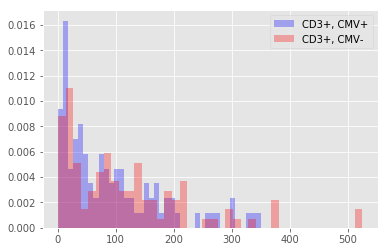

In [37]:
plt.style.use('ggplot')
kwargs = dict(histtype='stepfilled',alpha=0.3,normed=True,bins=40)
plt.hist(CD3p_CMVp,**kwargs,label='CD3+, CMV+', color='blue')
plt.hist(CD3p_CMVn,**kwargs,label='CD3+, CMV-', color='red')
plt.legend();

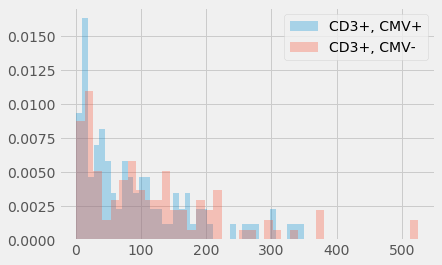

In [38]:
plt.style.use('fivethirtyeight')
kwargs = dict(histtype='stepfilled',alpha=0.3,normed=True,bins=40)
plt.hist(CD3p_CMVp,**kwargs,label='CD3+, CMV+')
plt.hist(CD3p_CMVn,**kwargs,label='CD3+, CMV-')
plt.legend();

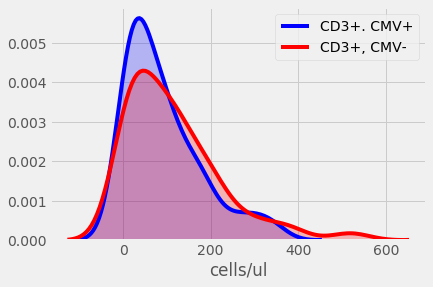

In [39]:
sns.kdeplot(CD3p_CMVp,shade=True,label='CD3+. CMV+',color="blue")
sns.kdeplot(CD3p_CMVn,shade=True,label='CD3+, CMV-', color="red")
plt.xlabel("cells/ul");

- Distribution of percentages per arm in the CD3+ reported population.

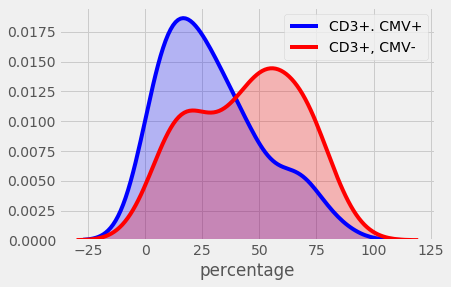

In [40]:
sns.kdeplot(pCD3p_CMVp,shade=True,label='CD3+. CMV+',color="blue")
sns.kdeplot(pCD3p_CMVn,shade=True,label='CD3+, CMV-', color="red");
plt.xlabel("percentage");

- For comparison, distributions per arm in the CD3- population

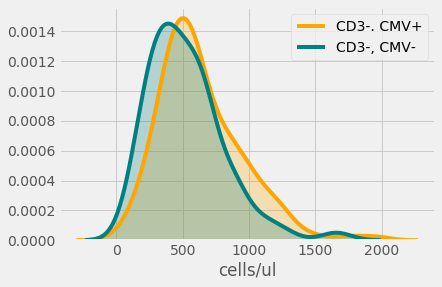

In [41]:
sns.kdeplot(CD3n_CMVp,shade=True,label='CD3-. CMV+', color="orange")
sns.kdeplot(CD3n_CMVn,shade=True,label='CD3-, CMV-', color="teal")
plt.xlabel("cells/ul");

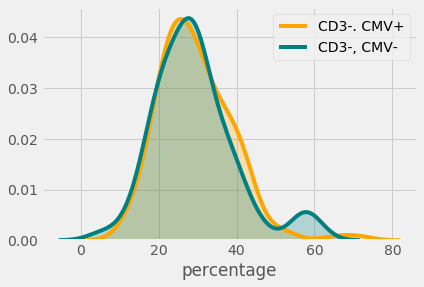

In [42]:
sns.kdeplot(pCD3n_CMVp,shade=True,label='CD3-. CMV+', color="orange")
sns.kdeplot(pCD3n_CMVn,shade=True,label='CD3-, CMV-', color="teal")
plt.xlabel("percentage");

- Distribution of cell counts per arm in the CD3+ reported population, as boxplot.

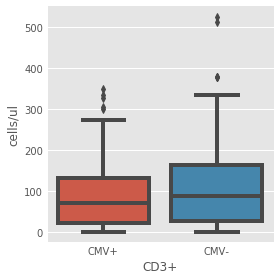

In [43]:
plt.style.use('ggplot')
g = sns.factorplot('ARM_ACCESSION','POPULATION_STATISTIC_REPORTED',data=CD3pos,kind="box")
g.set_xticklabels(['CMV+', 'CMV-']).set_axis_labels("CD3+", "cells/ul");

- Distribution of percentages per arm in the CD3+ reported population.

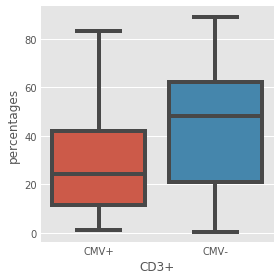

In [44]:
plt.style.use('ggplot')
g = sns.factorplot('ARM_ACCESSION','POPULATION_STATISTIC_REPORTED',data=pCD3pos,kind="box")
g.set_xticklabels(['CMV+', 'CMV-']).set_axis_labels("CD3+", "percentages");

- For comparison, distributions per arm in the CD3- population

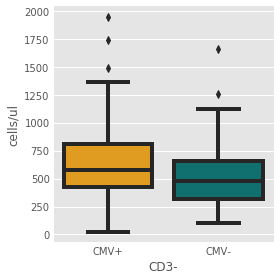

In [45]:
plt.style.use('ggplot')
g = sns.factorplot('ARM_ACCESSION','POPULATION_STATISTIC_REPORTED',data=CD3neg,kind="box", palette=["orange","teal"])
g.set_xticklabels(['CMV+', 'CMV-']).set_axis_labels("CD3-", "cells/ul");

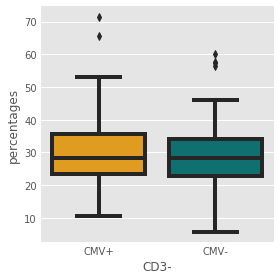

In [46]:
plt.style.use('ggplot')
g = sns.factorplot('ARM_ACCESSION','POPULATION_STATISTIC_REPORTED',data=pCD3neg,kind="box",palette=["orange","teal"])
g.set_xticklabels(['CMV+', 'CMV-']).set_axis_labels("CD3-", "percentages");